In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import SimpleITK as sitk

import cv2
import os
import shutil
import pydicom
import itk
from pathlib import Path

In [45]:
df = pd.read_excel('/workspace/src/DLT/analysis/final_dcm.xlsx')
df

Unnamed: 0       HID               OPDATE        DESCRIPTION  \
0               0   7745599  2016-06-07 00:00:00           Chest PA   
1               1   7779206  2008-05-07 00:00:00           Chest PA   
2               2   8212838  2011-06-02 00:00:00           Chest PA   
3               3   8652241  2014-08-25 00:00:00           Chest PA   
4               4   8684332  2016-11-07 00:00:00           Chest PA   
...           ...       ...                  ...                ...   
15105       15105  77759559  2016-12-20 00:00:00           Chest PA   
15106       15106  78935440  2021-11-01 00:00:00           Chest PA   
15107       15107  78984581  2021-03-19 00:00:00           Chest PA   
15108       15108  79976778  2020-09-07 00:00:00  Chest PA - AI CAD   
15109       15109  80202369  2021-04-30 00:00:00           Chest PA   

      ACQUISITION_DATE_TIME AIRWAY_DOUBLE_LUMEN  \
0       2016-06-04 15:45:10              DLT35.   
1       2008-05-06 16:50:34              DLT37.   
2       2011-06-01 13:06:42              DLT32.   
3       2014-08-24 19:17:09              DLT35.   
4       2016-11-03 16:26:57              DLT32.   
...                     ...                 ...   
15105   2016-12-19 13:29:12              DLT37.   
15106   2021-10-31 12:23:34              DLT37.   
15107   2021-03-17 17:49:29              DLT32.   
15108   2020-09-05 05:54:55              DLT32.   
15109   2021-04-29 17:16:50              DLT35.   

                                PATH  \
0      D:\20230307\07745599\20160604   
1      D:\20230307\07779206\20080506   
2      D:\20230307\08212838\20110601   
3      D:\20230307\08652241\20140824   
4      D:\20230307\08684332\20161103   
...                              ...   
15105  D:\20230307\77759559\20161219   
15106  D:\20230307\78935440\20211031   
15107  D:\20230307\78984581\20210317   
15108  D:\20230307\79976778\20200905   
15109  D:\20230307\80202369\20210429   

                                        JUPYTER_PATH  FILE_CNT  \
0      /workspace/src/DLT/20230307/07745599/20160604         4   
1      /workspace/src/DLT/20230307/07779206/20080506         4   
2      /workspace/src/DLT/20230307/08212838/20110601         1   
3      /workspace/src/DLT/20230307/08652241/20140824         4   
4      /workspace/src/DLT/20230307/08684332/20161103         1   
...                                              ...       ...   
15105  /workspace/src/DLT/20230307/77759559/20161219         4   
15106  /workspace/src/DLT/20230307/78935440/20211031         2   
15107  /workspace/src/DLT/20230307/78984581/20210317         4   
15108  /workspace/src/DLT/20230307/79976778/20200905         2   
15109  /workspace/src/DLT/20230307/80202369/20210429         1   

                                                     DCM  
0      1.3.46.670589.26.802065.4.20160604.154535.7684...  
1      1.3.46.670589.26.802065.4.20080506.165056.9467...  
2      1.2.392.200036.9125.9.0.252533546.3036676288.7...  
3      1.3.46.670589.26.802065.4.20140824.191757.8455...  
4      1.3.46.670589.26.802065.4.20161103.162728.1354...  
...                                                  ...  
15105  1.3.46.670589.26.802065.4.20161219.132938.1514...  
15106                                               find  
15107  1.3.46.670589.26.802065.4.20210317.175001.7284...  
15108                                               find  
15109  1.3.46.670589.26.802065.4.20210429.171717.7450...  

[15110 rows x 10 columns]

In [46]:
df_dcm = df[df['DCM'] != 'find']
df_dcm

Unnamed: 0       HID               OPDATE DESCRIPTION  \
0               0   7745599  2016-06-07 00:00:00    Chest PA   
1               1   7779206  2008-05-07 00:00:00    Chest PA   
2               2   8212838  2011-06-02 00:00:00    Chest PA   
3               3   8652241  2014-08-25 00:00:00    Chest PA   
4               4   8684332  2016-11-07 00:00:00    Chest PA   
...           ...       ...                  ...         ...   
15103       15103  77462172  2019-10-28 00:00:00    Chest PA   
15104       15104  77465436  2021-08-20 00:00:00    Chest PA   
15105       15105  77759559  2016-12-20 00:00:00    Chest PA   
15107       15107  78984581  2021-03-19 00:00:00    Chest PA   
15109       15109  80202369  2021-04-30 00:00:00    Chest PA   

      ACQUISITION_DATE_TIME AIRWAY_DOUBLE_LUMEN  \
0       2016-06-04 15:45:10              DLT35.   
1       2008-05-06 16:50:34              DLT37.   
2       2011-06-01 13:06:42              DLT32.   
3       2014-08-24 19:17:09              DLT35.   
4       2016-11-03 16:26:57              DLT32.   
...                     ...                 ...   
15103   2019-10-25 10:51:40              DLT37.   
15104   2021-08-19 16:20:14              DLT37.   
15105   2016-12-19 13:29:12              DLT37.   
15107   2021-03-17 17:49:29              DLT32.   
15109   2021-04-29 17:16:50              DLT35.   

                                PATH  \
0      D:\20230307\07745599\20160604   
1      D:\20230307\07779206\20080506   
2      D:\20230307\08212838\20110601   
3      D:\20230307\08652241\20140824   
4      D:\20230307\08684332\20161103   
...                              ...   
15103  D:\20230307\77462172\20191025   
15104  D:\20230307\77465436\20210819   
15105  D:\20230307\77759559\20161219   
15107  D:\20230307\78984581\20210317   
15109  D:\20230307\80202369\20210429   

                                        JUPYTER_PATH  FILE_CNT  \
0      /workspace/src/DLT/20230307/07745599/20160604         4   
1      /workspace/src/DLT/20230307/07779206/20080506         4   
2      /workspace/src/DLT/20230307/08212838/20110601         1   
3      /workspace/src/DLT/20230307/08652241/20140824         4   
4      /workspace/src/DLT/20230307/08684332/20161103         1   
...                                              ...       ...   
15103  /workspace/src/DLT/20230307/77462172/20191025         3   
15104  /workspace/src/DLT/20230307/77465436/20210819         3   
15105  /workspace/src/DLT/20230307/77759559/20161219         4   
15107  /workspace/src/DLT/20230307/78984581/20210317         4   
15109  /workspace/src/DLT/20230307/80202369/20210429         1   

                                                     DCM  
0      1.3.46.670589.26.802065.4.20160604.154535.7684...  
1      1.3.46.670589.26.802065.4.20080506.165056.9467...  
2      1.2.392.200036.9125.9.0.252533546.3036676288.7...  
3      1.3.46.670589.26.802065.4.20140824.191757.8455...  
4      1.3.46.670589.26.802065.4.20161103.162728.1354...  
...                                                  ...  
15103  1.2.840.113564.1721620236.20191025104931693520...  
15104  1.2.840.113564.1721620236.20210819161928502210...  
15105  1.3.46.670589.26.802065.4.20161219.132938.1514...  
15107  1.3.46.670589.26.802065.4.20210317.175001.7284...  
15109  1.3.46.670589.26.802065.4.20210429.171717.7450...  

[11968 rows x 10 columns]

In [65]:
df_dcm_32 = df_dcm[df_dcm['AIRWAY_DOUBLE_LUMEN'] == 'DLT32.']

In [54]:
df_dcm_35 = df_dcm[df_dcm['AIRWAY_DOUBLE_LUMEN'] == 'DLT35.']
dcm_35_list = df_dcm_35['DCM'].tolist()
dcm_35 = []
for i in range(len(dcm_35_list)):
    dcm_35.append(dcm_35_list[i][:-4])

In [89]:
dirListing = os.listdir('/workspace/src/DLT/png/Train/DLT32/')
for i in range(50):
    current = '/workspace/src/DLT/png/Train/DLT32/'
    dest = '/workspace/src/DLT/png/Test/DLT32/'
    current_id = current + dirListing[i]
    dest_id = dest + dirListing[i]
    shutil.move(current_id, dest_id)

In [73]:
df_dcm_37 = df_dcm[df_dcm['AIRWAY_DOUBLE_LUMEN'] == 'DLT37.']
dcm_37_list = df_dcm_37['DCM'].tolist()
dcm_37 = []
for i in range(len(dcm_37_list)):
    dcm_37.append(dcm_37_list[i][:-4])

In [ ]:
for i in range(len(png_list)):
    current = '/workspace/src/DLT/png/DLT35/'
    if png_list[i] in dcm_37:
        dest = '/workspace/src/DLT/png/DLT37/'
        current_id = current + png_list[i] + '.png'
        dest_id = dest + png_list[i] + '.png'
        shutil.move(current_id, dest_id)

In [4]:
png_l = os.listdir('/workspace/src/DLT/png/Train/DLT32')
png_list = []
for i in range(len(png_l)):
    png_list.append(png_l[i])
current = '/workspace/src/DLT/png/Train/DLT32/'
dest = '/workspace/src/DLT/png_full/'
for i in range(len(png_list)):
    current_id = current + png_list[i]
    dest_id = dest + png_list[i]
    shutil.copy(current_id, dest_id)

In [5]:
png_l = os.listdir('/workspace/src/DLT/png/Train/DLT35')
png_list = []
for i in range(len(png_l)):
    png_list.append(png_l[i])
current = '/workspace/src/DLT/png/Train/DLT35/'
dest = '/workspace/src/DLT/png_full/'
for i in range(len(png_list)):
    current_id = current + png_list[i]
    dest_id = dest + png_list[i]
    shutil.copy(current_id, dest_id)

In [6]:
png_l = os.listdir('/workspace/src/DLT/png/Train/DLT37')
png_list = []
for i in range(len(png_l)):
    png_list.append(png_l[i])
current = '/workspace/src/DLT/png/Train/DLT37/'
dest = '/workspace/src/DLT/png_full/'
for i in range(len(png_list)):
    current_id = current + png_list[i]
    dest_id = dest + png_list[i]
    shutil.copy(current_id, dest_id)

In [40]:
jupyter_path_list = df_dcm['JUPYTER_PATH'].tolist()
dcm_list = df_dcm['DCM'].tolist()

In [42]:
spacing = []
for i in range(len(jupyter_path_list)):
    file_path = jupyter_path_list[i] + '/'+ dcm_list[i]
    ds = pydicom.dcmread(file_path)
    if 'PixelSpacing' in dir(ds):
        space = ds.PixelSpacing
        spacing.append(space)
    else:
        spacing.append("No")
len(spacing)

11968

In [43]:
for i in range(len(jupyter_path_list)):
    file_path = jupyter_path_list[i] + '/'+ dcm_list[i]
    ds = pydicom.dcmread(file_path)
    new_image = ds.pixel_array.astype(float)
    # if 'PhotometricInterpretation' in dir(ds):
    if ds.PhotometricInterpretation == 'MONOCHROME1':
        scaled_image = 255.0 - ((np.maximum(new_image, 0) / new_image.max()) * 255.0)
    else:
        scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
    scaled_image = np.uint8(scaled_image)
    final_image = Image.fromarray(scaled_image)
    final_image.save('/workspace/src/DLT/png/'+dcm_list[i][:-4]+'.png')

In [29]:
ds = pydicom.dcmread('/workspace/src/DLT/20230307/07745599/20160604/1.3.46.670589.26.802065.4.20160604.154535.76841.0.dcm')
new_image = ds.pixel_array.astype(float)
# if 'PhotometricInterpretation' in dir(ds):
if ds.PhotometricInterpretation == 'MONOCHROME1':
    scaled_image = 255.0 - ((np.maximum(new_image, 0) / new_image.max()) * 255.0)
else:
    scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
scaled_image = np.uint8(scaled_image)
final_image = Image.fromarray(scaled_image)

In [30]:
ds = pydicom.dcmread('/workspace/src/DLT/20230307/07745599/20160604/1.3.46.670589.26.802065.4.20160604.154535.76841.0.dcm')
spacing = ds.PixelSpacing
print(spacing)

[0.144, 0.144]


In [37]:
dcm_image = sitk.ReadImage('/workspace/src/DLT/20230307/07745599/20160604/1.3.46.670589.26.802065.4.20160604.154535.76841.0.dcm')
dcm_image

GDCMImageIO (0x7f0bc0035b40): Converting from MONOCHROME1 to MONOCHROME2 may impact the meaning of DICOM attributes related to pixel values.



<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f0a56775f00> >

In [31]:
print(len(scaled_image), len(scaled_image[0]))

2989 2560


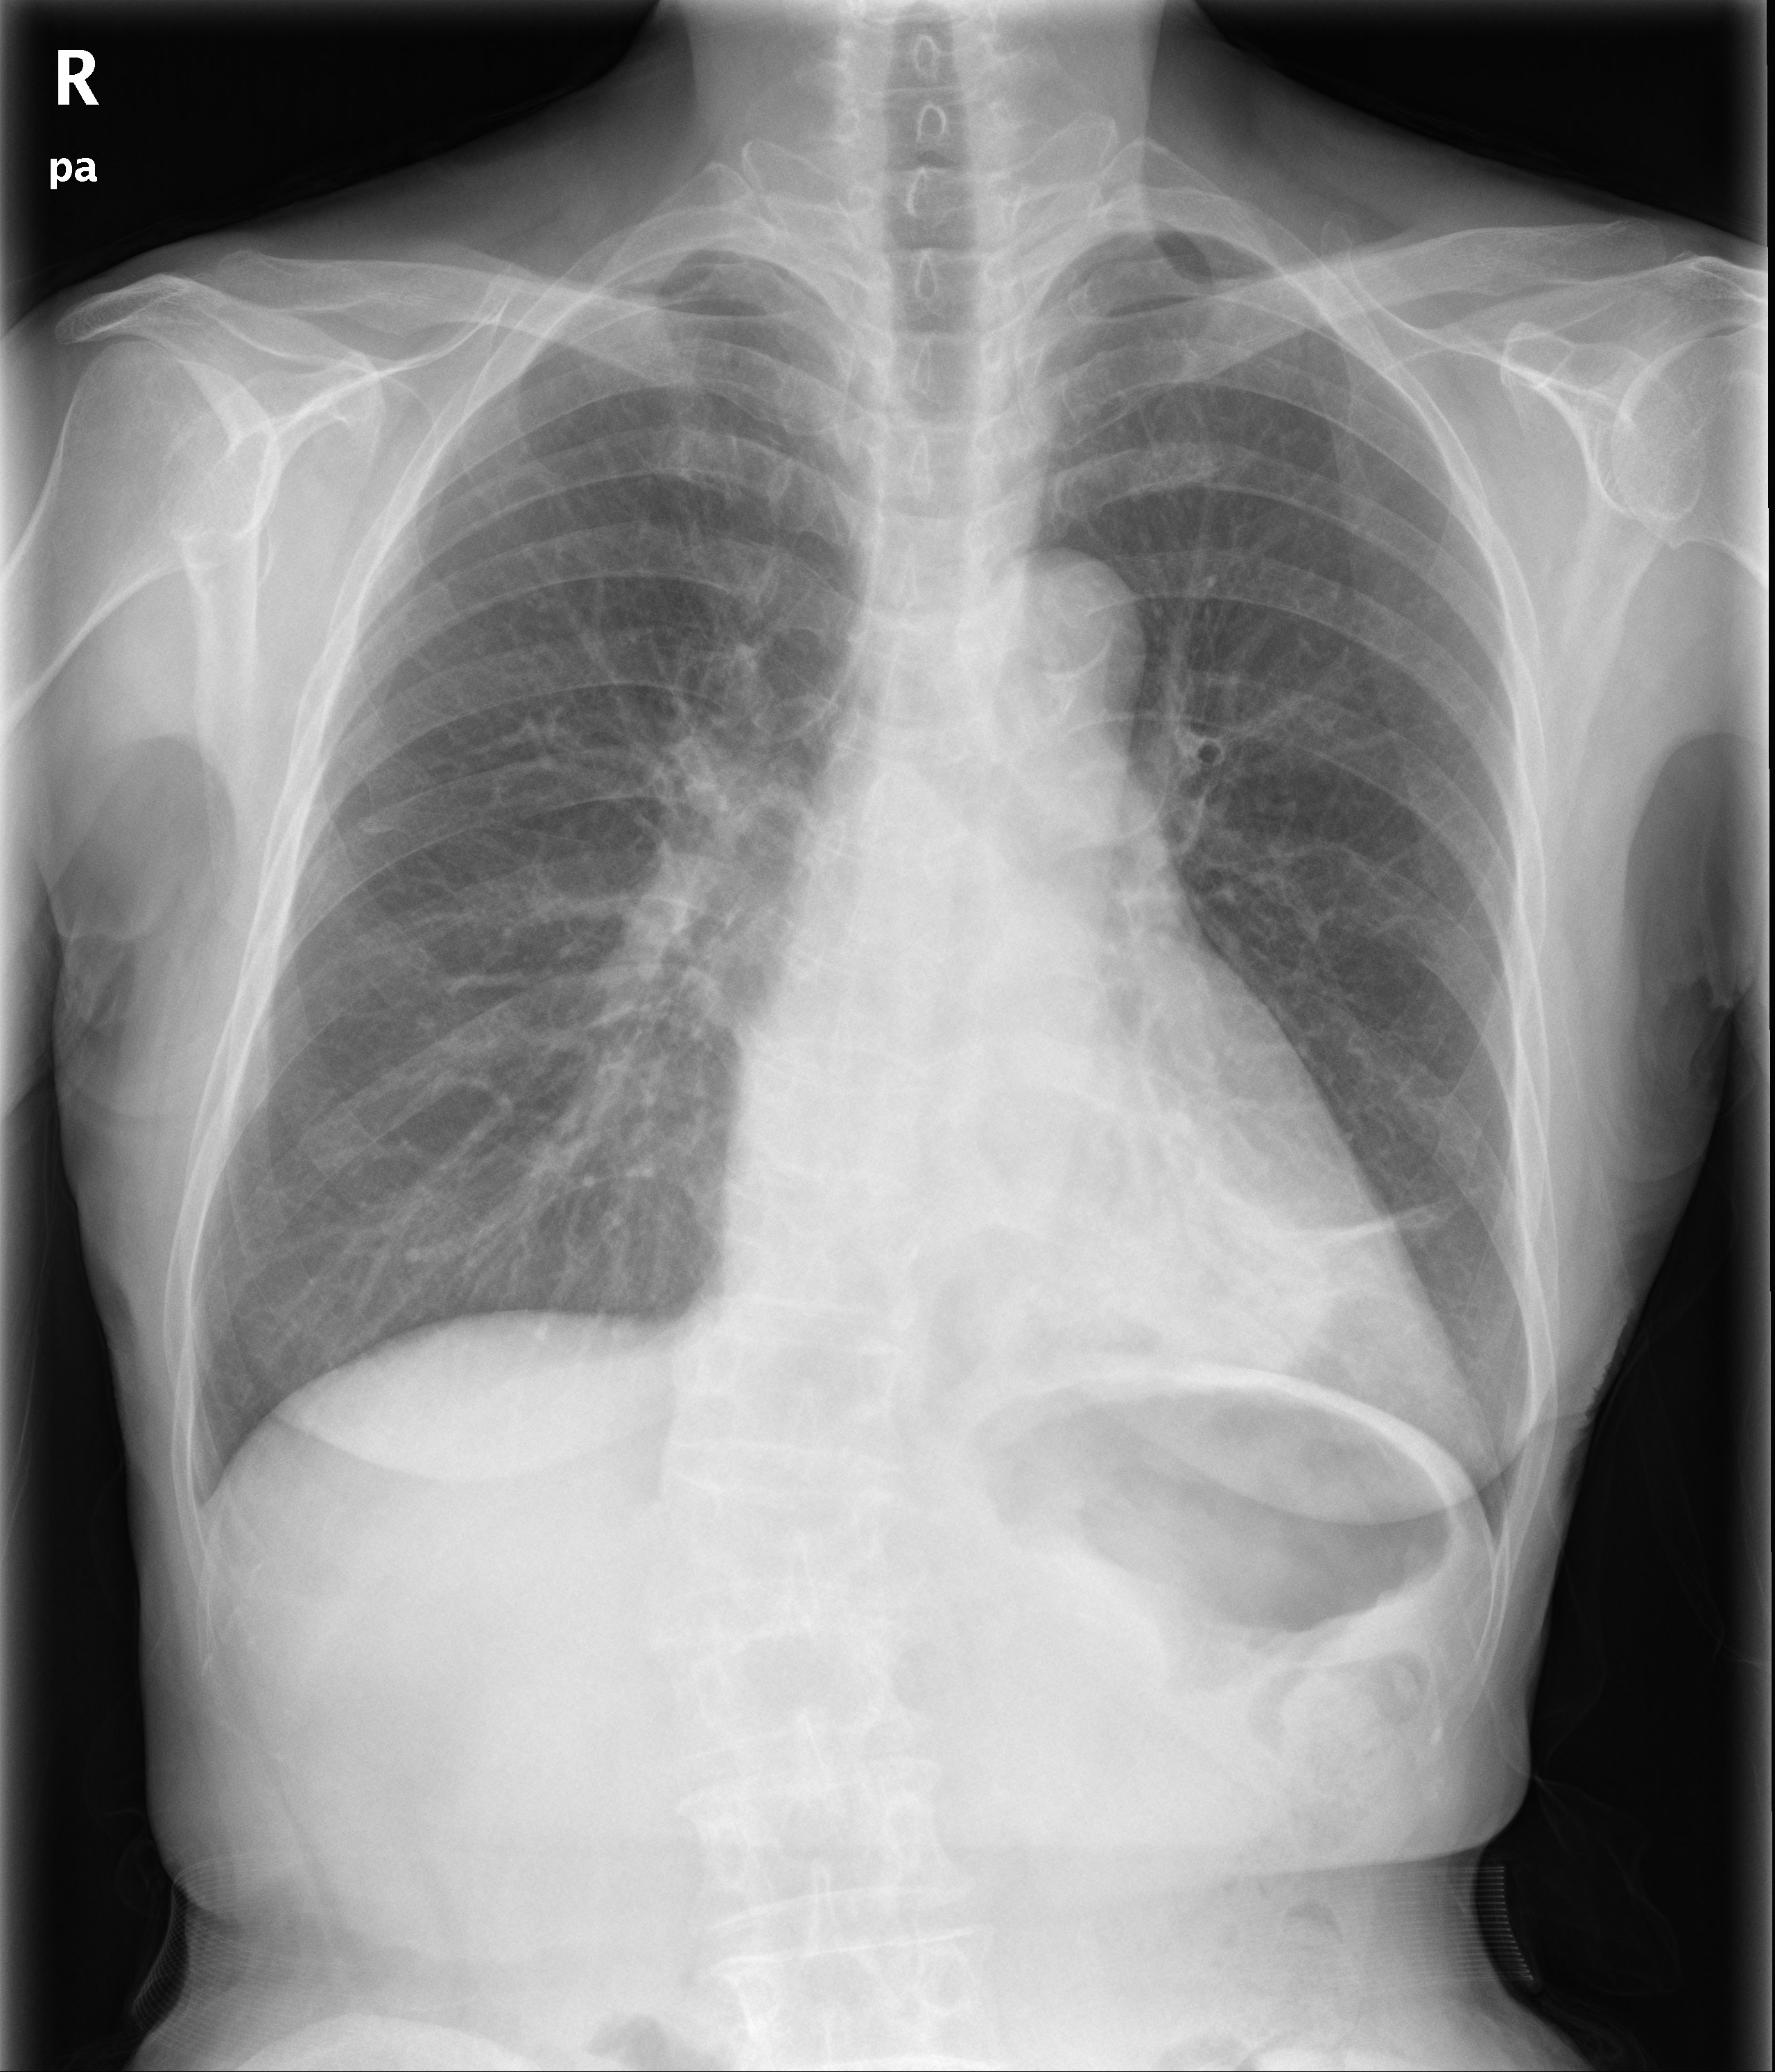

In [32]:
final_image.show()

In [22]:
ds = pydicom.dcmread('/workspace/src/DLT/20230307/07779206/20080506/1.3.46.670589.26.802065.4.20080506.165056.9467.0.dcm')
new_image = ds.pixel_array.astype(float)
# if 'PhotometricInterpretation' in dir(ds):
if ds.PhotometricInterpretation == 'MONOCHROME1':
    scaled_image = 255.0 - ((np.maximum(new_image, 0) / new_image.max()) * 255.0)
else:
    scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
scaled_image = np.uint8(scaled_image)
final_image = Image.fromarray(scaled_image)

In [24]:
print(len(scaled_image), len(scaled_image[0]))

3001 2572


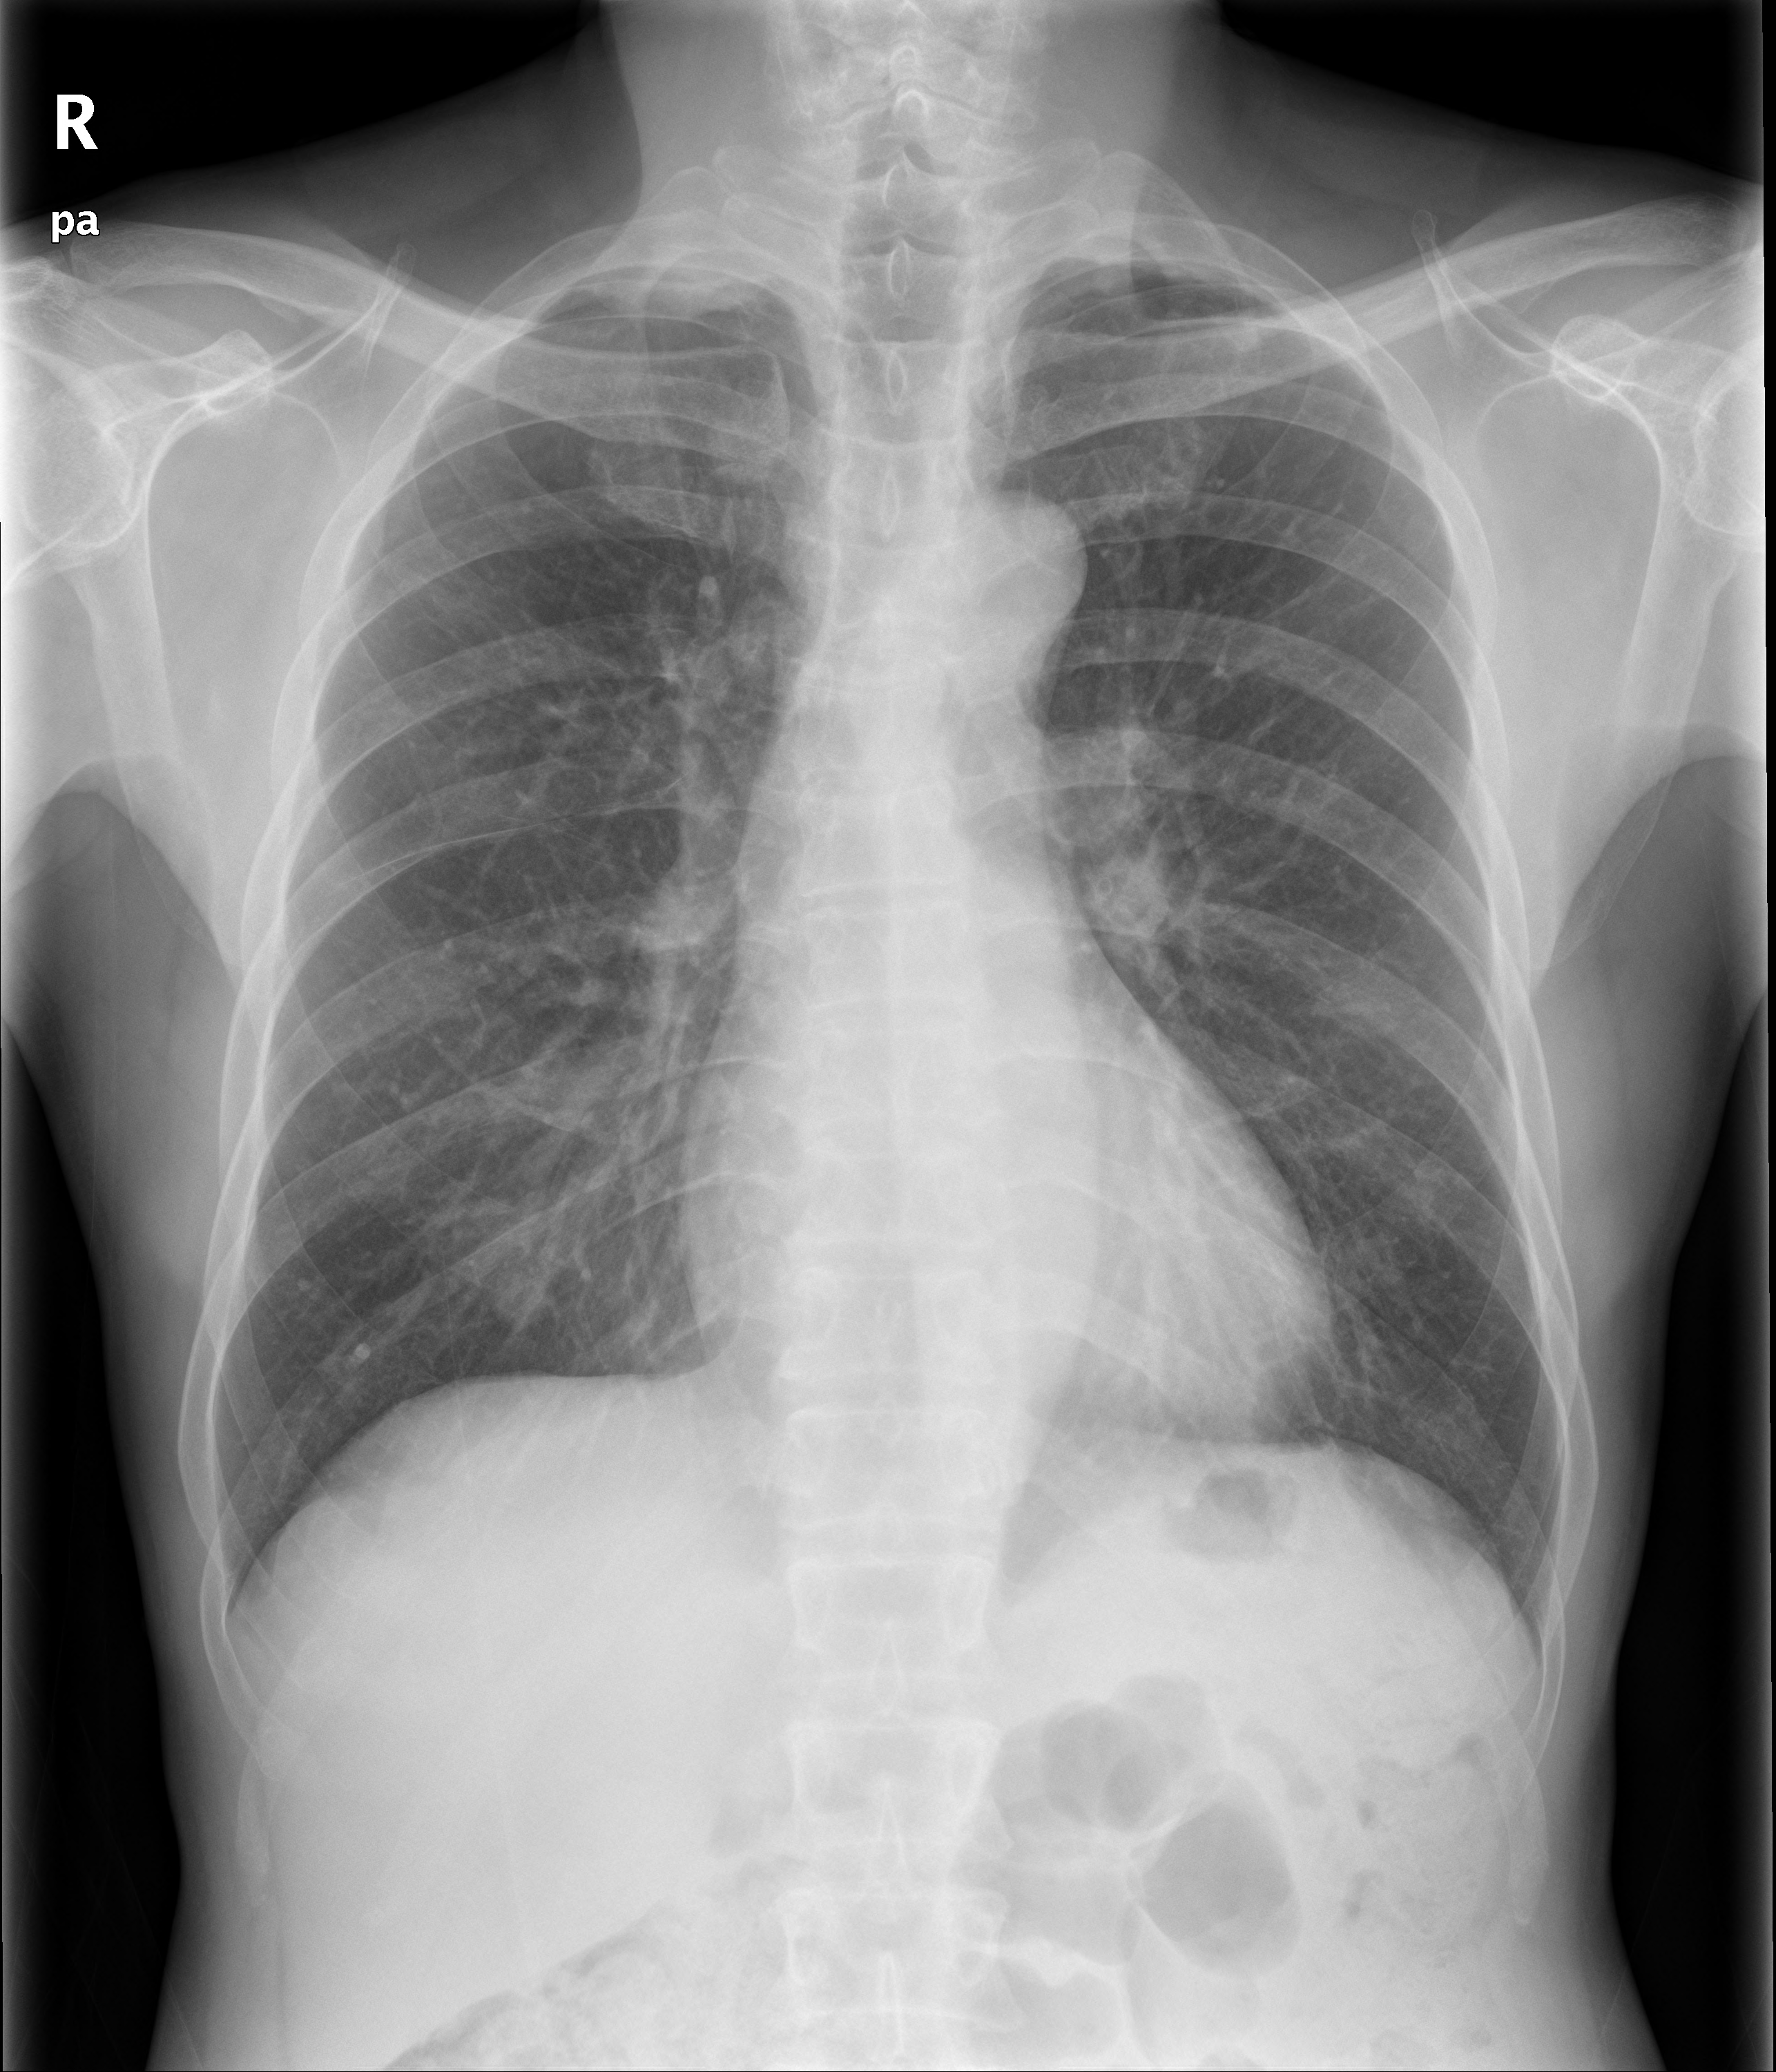

In [23]:
final_image.show()